In [1]:
from itertools import product
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# complex grid
size = 3.5
resolution = 1001
Re, Im = np.meshgrid(
    np.linspace(-size, size, resolution),
    np.linspace(complex(0, -size), complex(0, size), resolution),
)
z = Re + Im
Im_real = (Im * -1j).real  # for plotting

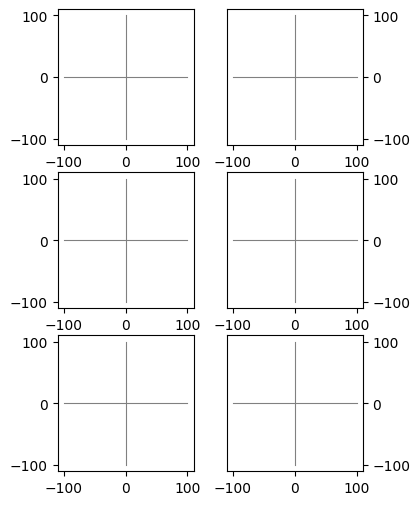

In [3]:
# initialize figure
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, figsize=(4, 6))
for i, j in product(range(3), range(2)):
    axs[i, j].set_aspect("equal")
    axs[i, j].plot([0, 0], [-100, 100], "grey", linewidth=0.8, zorder=-1)  # y-axis
    axs[i, j].plot([-100, 100], [0, 0], "grey", linewidth=0.8, zorder=-1)  # x-axis

for i in range(3):
    axs[i, 1].yaxis.tick_right()


def pcolor(p):
    return mpl.colormaps["viridis"]((p + 1) / 8)

In [4]:
# amplification factors of RK schemes
euler = np.abs(1 + z)
rk2 = np.abs(1 + z + z**2 / 2)
rk3 = np.abs(1 + z + z**2 / 2 + z**3 / 6)
rk4 = np.abs(1 + z + z**2 / 2 + z**3 / 6 + z**4 / 24)
rk6 = np.abs(
    1
    + z
    + z**2 / 2
    + z**3 / 6
    + z**4 / 24
    + z**5 / 120
    + z**6 / 720
    - z**7 / 2160
)

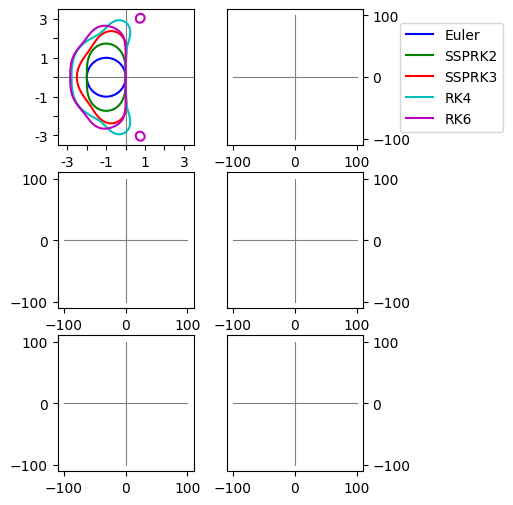

In [5]:
# contours
axs[0, 0].contour(Re, Im_real, euler, [1], colors="b")
axs[0, 0].contour(Re, Im_real, rk2, [1], colors="g")
axs[0, 0].contour(Re, Im_real, rk3, [1], colors="r")
axs[0, 0].contour(Re, Im_real, rk4, [1], colors="c")
axs[0, 0].contour(Re, Im_real, rk6, [1], colors="m")

# dummy lines for legend
contour1 = Line2D([], [], color="b", label="Euler")
contour2 = Line2D([], [], color="g", label="SSPRK2")
contour3 = Line2D([], [], color="r", label="SSPRK3")
contour4 = Line2D([], [], color="c", label="RK4")
contour5 = Line2D([], [], color="m", label="RK6")

# cosmetics
axs[0, 0].legend(
    loc="center",
    bbox_to_anchor=(2.9, 0.5),
    handles=[contour1, contour2, contour3, contour4, contour5],
)
axs[0, 0].set_xlim(-3.5, 3.5)
axs[0, 0].set_ylim(-3.5, 3.5)
axs[0, 0].set_xticks([-3, -2, -1, 0, 1, 2, 3])
axs[0, 0].set_xticklabels([-3, None, -1, None, 1, None, 3])
axs[0, 0].set_yticks([-3, -2, -1, 0, 1, 2, 3])
axs[0, 0].set_yticklabels([-3, None, -1, None, 1, None, 3])

fig

In [6]:
# stability regions of high order FV
k = np.linspace(-np.pi, np.pi, 100)
upwinding = {p: {} for p in range(8)}
# first order upwind
upwinding[0]["x"] = -(-np.cos(k) + 1)
upwinding[0]["y"] = -(+np.sin(k))
# second order upwind
upwinding[1]["x"] = -(+np.cos(2 * k) - 5 * np.cos(k) + 3 + np.cos(k)) / 4
upwinding[1]["y"] = -(-np.sin(2 * k) + 5 * np.sin(k) + np.sin(k)) / 4
# third order upwind
upwinding[2]["x"] = -(+np.cos(2 * k) - 6 * np.cos(k) + 3 + 2 * np.cos(k)) / 6
upwinding[2]["y"] = -(-np.sin(2 * k) + 6 * np.sin(k) + 2 * np.sin(k)) / 6
# fourth ordered upwind
upwinding[3]["x"] = -(1 / 24) * (
    -np.cos(3 * k)
    + 7 * np.cos(2 * k)
    - 26 * np.cos(k)
    + 10
    + 11 * np.cos(k)
    - np.cos(2 * k)
)
upwinding[3]["y"] = -(1 / 24) * (
    +np.sin(3 * k) - 7 * np.sin(2 * k) + 26 * np.sin(k) + 11 * np.sin(k) - np.sin(2 * k)
)
# fifth order upwind
upwinding[4]["x"] = -(1 / 60) * (
    -2 * np.cos(3 * k)
    + 15 * np.cos(2 * k)
    - 60 * np.cos(k)
    + 20
    + 30 * np.cos(k)
    - 3 * np.cos(2 * k)
)
upwinding[4]["y"] = -(1 / 60) * (
    +2 * np.sin(3 * k)
    - 15 * np.sin(2 * k)
    + 60 * np.sin(k)
    + 30 * np.sin(k)
    - 3 * np.sin(2 * k)
)
# sixth order upwind
upwinding[5]["x"] = -(1 / 120) * (
    +1 * np.cos(4 * k)
    - 9 * np.cos(3 * k)
    + 39 * np.cos(2 * k)
    - 125 * np.cos(k)
    + 35
    + 69 * np.cos(k)
    - 11 * np.cos(2 * k)
    + 1 * np.cos(3 * k)
)
upwinding[5]["y"] = -(1 / 120) * (
    -1 * np.sin(4 * k)
    + 9 * np.sin(3 * k)
    - 39 * np.sin(2 * k)
    + 125 * np.sin(k)
    + 69 * np.sin(k)
    - 11 * np.sin(2 * k)
    + 1 * np.sin(3 * k)
)
# seventh order upwind
upwinding[6]["x"] = -(1 / 420) * (
    +3 * np.cos(4 * k)
    - 28 * np.cos(3 * k)
    + 126 * np.cos(2 * k)
    - 420 * np.cos(k)
    + 105
    + 252 * np.cos(k)
    - 42 * np.cos(2 * k)
    + 4 * np.cos(3 * k)
)
upwinding[6]["y"] = -(1 / 420) * (
    -3 * np.sin(4 * k)
    + 28 * np.sin(3 * k)
    - 126 * np.sin(2 * k)
    + 420 * np.sin(k)
    + 252 * np.sin(k)
    - 42 * np.sin(2 * k)
    + 4 * np.sin(3 * k)
)
# eight order upwind
upwinding[7]["x"] = -(1 / 1680) * (
    -3 * np.cos(5 * k)
    + 33 * np.cos(4 * k)
    - 172 * np.cos(3 * k)
    + 588 * np.cos(2 * k)
    - 1722 * np.cos(k)
    + 378
    + 1092 * np.cos(k)
    - 228 * np.cos(2 * k)
    + 37 * np.cos(3 * k)
    - 3 * np.cos(4 * k)
)
upwinding[7]["y"] = -(1 / 1680) * (
    +3 * np.sin(5 * k)
    - 33 * np.sin(4 * k)
    + 172 * np.sin(3 * k)
    - 588 * np.sin(2 * k)
    + 1722 * np.sin(k)
    + 1092 * np.sin(k)
    - 228 * np.sin(2 * k)
    + 37 * np.sin(3 * k)
    - 3 * np.sin(4 * k)
)

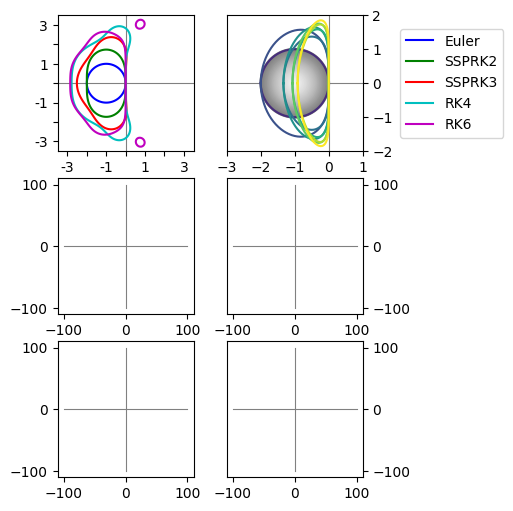

In [7]:
# Euler

# euler stability region
for level in np.linspace(1, 0, 51):
    axs[0, 1].contour(
        Re,
        Im_real,
        euler,
        levels=[level],
        linestyles="-",
        linewidths=[2],
        colors=[mpl.colormaps["Greys"](0.5 * level + 0.1)],
    )

# upwinding stability tracks
for p in range(8):
    axs[0, 1].plot(upwinding[p]["x"], upwinding[p]["y"], color=pcolor(p))

# cosmetics
axs[0, 1].set_xlim(-3, 1)
axs[0, 1].set_ylim(-2, 2)
axs[0, 1].set_xticks([-3, -2, -1, 0, 1])
axs[0, 1].set_yticks([-2, -1, 0, 1, 2])

fig

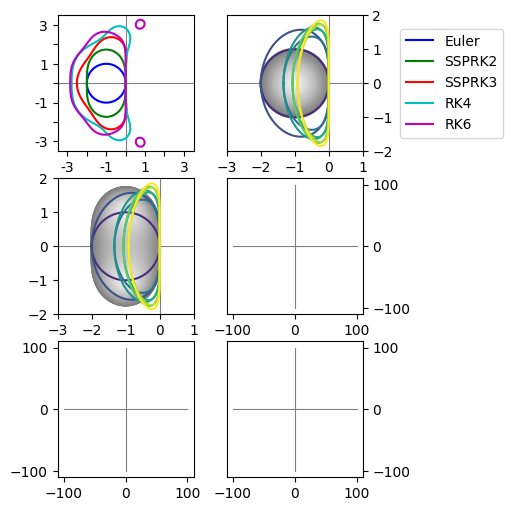

In [8]:
# RK2

# RK2 stability region
for level in np.linspace(1, 0, 201):
    axs[1, 0].contour(
        Re,
        Im_real,
        rk2,
        levels=[level],
        linestyles="-",
        linewidths=[2],
        colors=[mpl.colormaps["Greys"](0.5 * level + 0.1)],
    )

# upwinding stability tracks
for p in range(8):
    axs[1, 0].plot(upwinding[p]["x"], upwinding[p]["y"], color=pcolor(p))

# cosmetics
axs[1, 0].set_xlim(-3, 1)
axs[1, 0].set_ylim(-2, 2)
axs[1, 0].set_xticks([-3, -2, -1, 0, 1])
axs[1, 0].set_yticks([-2, -1, 0, 1, 2])

fig

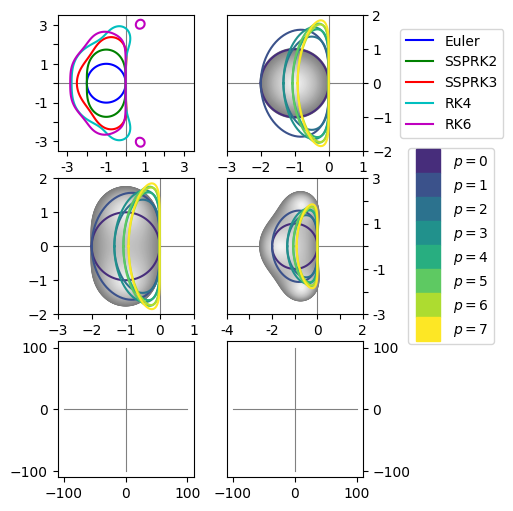

In [9]:
# RK3

# RK3 stability region
for level in np.linspace(1, 0, 101):
    axs[1, 1].contour(
        Re,
        Im_real,
        rk3,
        levels=[level],
        linestyles="-",
        linewidths=[2],
        colors=[mpl.colormaps["Greys"](0.5 * level + 0.1)],
    )

# upwinding stability tracks
for p in range(8):
    axs[1, 1].plot(
        upwinding[p]["x"], upwinding[p]["y"], color=pcolor(p), label=f"${p=}$"
    )

# cosmetics
leg = axs[1, 1].legend(loc="center", bbox_to_anchor=(1.65, 0.5))
axs[1, 1].set_xlim(-4, 2)
axs[1, 1].set_ylim(-3, 3)
axs[1, 1].set_xticks([-4, -3, -2, -1, 0, 1, 2])
axs[1, 1].set_xticklabels([-4, None, -2, None, 0, None, 2])
axs[1, 1].set_yticks([-3, -2, -1, 0, 1, 2, 3])
axs[1, 1].set_yticklabels([-3, None, -1, None, 1, None, 3])

for line, p in zip(leg.get_lines(), range(8)):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(17)
    line.set_markerfacecolor(pcolor(p))
fig

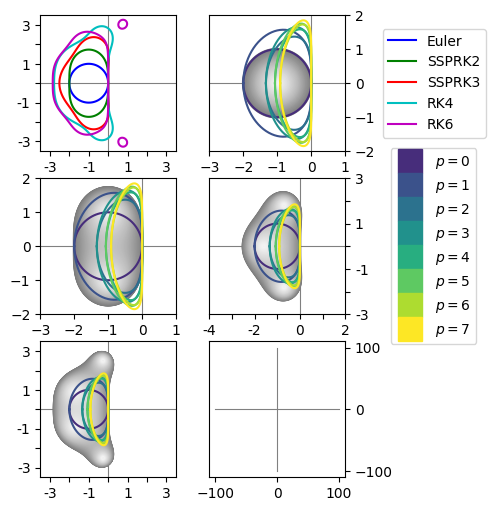

In [10]:
# RK4

# RK4 stability region
for level in np.linspace(1, 0, 201):
    axs[2, 0].contour(
        Re,
        Im_real,
        rk4,
        levels=[level],
        linestyles="-",
        linewidths=[2],
        colors=[mpl.colormaps["Greys"](0.5 * level + 0.1)],
    )

# upwinding stability tracks
for p in range(8):
    axs[2, 0].plot(upwinding[p]["x"], upwinding[p]["y"], color=pcolor(p))

# cosmetics
axs[2, 0].set_xlim(-3.5, 3.5)
axs[2, 0].set_ylim(-3.5, 3.5)
axs[2, 0].set_xticks([-3, -2, -1, 0, 1, 2, 3])
axs[2, 0].set_xticklabels([-3, None, -1, None, 1, None, 3])
axs[2, 0].set_yticks([-3, -2, -1, 0, 1, 2, 3])
axs[2, 0].set_yticklabels([-3, None, -1, None, 1, None, 3])

fig

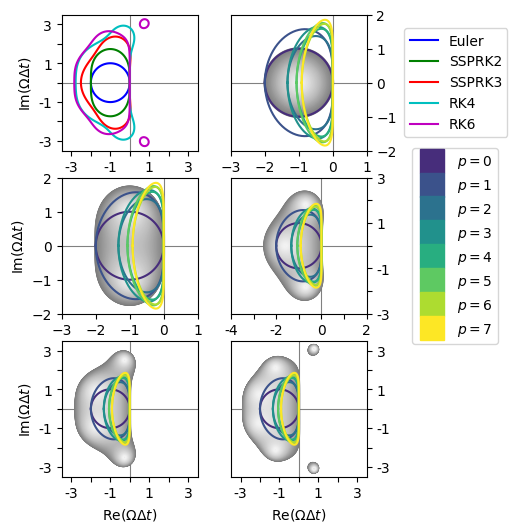

In [11]:
# RK6

# euler stability region
for level in np.linspace(1, 0, 201):
    axs[2, 1].contour(
        Re,
        Im_real,
        rk6,
        levels=[level],
        linestyles="-",
        linewidths=[2],
        colors=[mpl.colormaps["Greys"](0.5 * level + 0.1)],
    )

# upwinding stability tracks
for p in range(8):
    axs[2, 1].plot(upwinding[p]["x"], upwinding[p]["y"], color=pcolor(p))

# cosmetics
axs[2, 1].set_xlim(-3.5, 3.5)
axs[2, 1].set_ylim(-3.5, 3.5)
axs[2, 1].set_xticks([-3, -2, -1, 0, 1, 2, 3])
axs[2, 1].set_xticklabels([-3, None, -1, None, 1, None, 3])
axs[2, 1].set_yticks([-3, -2, -1, 0, 1, 2, 3])
axs[2, 1].set_yticklabels([-3, None, -1, None, 1, None, 3])
axs[2, 0].set_xlabel("Re($\Omega \Delta t)$")
axs[2, 1].set_xlabel("Re($\Omega \Delta t$)")
axs[0, 0].set_ylabel("Im($\Omega \Delta t$)")
axs[1, 0].set_ylabel("Im($\Omega \Delta t$)")
axs[2, 0].set_ylabel("Im($\Omega \Delta t$)")

fig

In [12]:
# download
fig.savefig("images/RK_stability_regions.png", dpi=300, bbox_inches="tight")